In [25]:
#Q1:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV


In [27]:
path = "C:\\Users\\BOUZAKRI\\Desktop\\EMI\\prostate_dataset.txt"
data = pd.read_csv(path, delim_whitespace=True)
print(data.head())

   col    lcavol   lweight  age      lbph  svi       lcp  gleason  pgg45  \
0    1 -0.579818  2.769459   50 -1.386294    0 -1.386294        6      0   
1    2 -0.994252  3.319626   58 -1.386294    0 -1.386294        6      0   
2    3 -0.510826  2.691243   74 -1.386294    0 -1.386294        7     20   
3    4 -1.203973  3.282789   58 -1.386294    0 -1.386294        6      0   
4    5  0.751416  3.432373   62 -1.386294    0 -1.386294        6      0   

       lpsa train  
0 -0.430783     T  
1 -0.162519     T  
2 -0.162519     T  
3 -0.162519     T  
4  0.371564     T  


C:\Users\BOUZAKRI\AppData\Local\Temp\ipykernel_21724\656242200.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(path, delim_whitespace=True)


In [9]:
#Q2:
data = data.drop(columns=['col', 'train'])

# Afficher les informations des données pour s'assurer que les colonnes sont bien supprimées
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   lcavol   97 non-null     float64
 1   lweight  97 non-null     float64
 2   age      97 non-null     int64  
 3   lbph     97 non-null     float64
 4   svi      97 non-null     int64  
 5   lcp      97 non-null     float64
 6   gleason  97 non-null     int64  
 7   pgg45    97 non-null     int64  
 8   lpsa     97 non-null     float64
dtypes: float64(5), int64(4)
memory usage: 6.9 KB
None


          lcavol    lweight        age       lbph        svi        lcp  \
count  97.000000  97.000000  97.000000  97.000000  97.000000  97.000000   
mean    1.350010   3.628943  63.865979   0.100356   0.216495  -0.179366   
std     1.178625   0.428411   7.445117   1.450807   0.413995   1.398250   
min    -1.347074   2.374906  41.000000  -1.386294   0.000000  -1.386294   
25%     0.512824   3.375880  60.000000  -1.386294   0.000000  -1.386294   
50%     1.446919   3.623007  65.000000   0.300105   0.000000  -0.798508   
75%     2.127041   3.876396  68.000000   1.558145   0.000000   1.178655   
max     3.821004   4.780383  79.000000   2.326302   1.000000   2.904165   

         gleason       pgg45       lpsa  
count  97.000000   97.000000  97.000000  
mean    6.752577   24.381443   2.478387  
std     0.722134   28.204035   1.154329  
min     6.000000    0.000000  -0.430783  
25%     6.000000    0.000000   1.731656  
50%     7.000000   15.000000   2.591516  
75%     7.000000   40.000000  

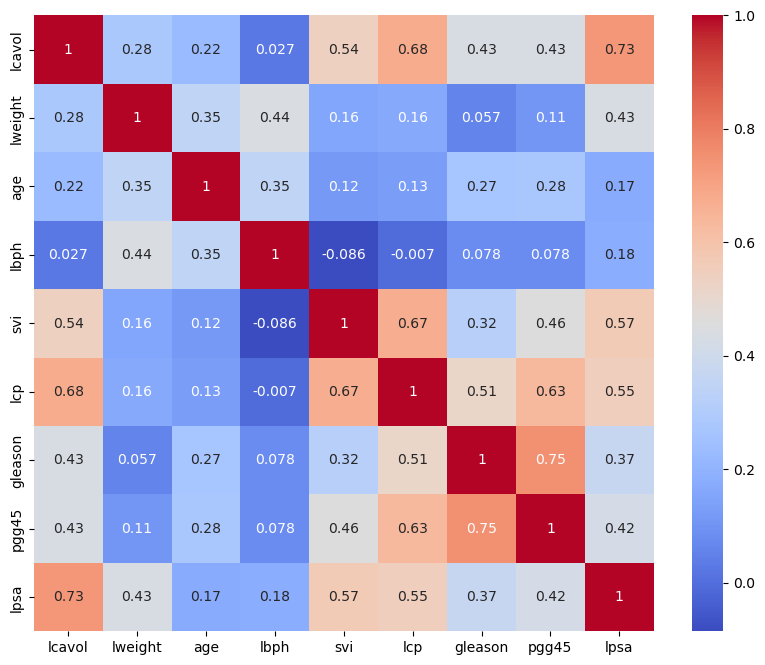

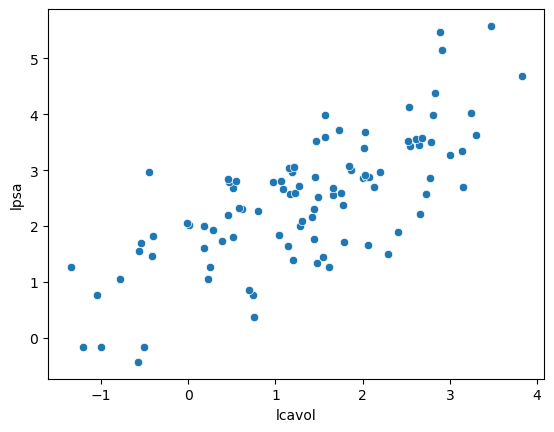

In [11]:
#Q3:

print(data.describe())
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

sns.scatterplot(x=data['lcavol'], y=data['lpsa'])
plt.xlabel('lcavol')
plt.ylabel('lpsa')
plt.show()


In [13]:
#Q4:

X = data.drop(columns=['lpsa'])
y = data['lpsa']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [16]:
#Q5:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [18]:
#Q6-7:

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

print(f"Train R2: {r2_score(y_train, y_pred_train)}, Test R2: {r2_score(y_test, y_pred_test)}")
print(f"Train MSE: {mean_squared_error(y_train, y_pred_train)}, Test MSE: {mean_squared_error(y_test, y_pred_test)}")


Train R2: 0.6688578195140975, Test R2: 0.6039185108581987
Train MSE: 0.4554477730389063, Test MSE: 0.46129595961858566


In [20]:
#Q8-9:

ridge = Ridge(alpha=2.14)
ridge.fit(X_train, y_train)

y_pred_ridge = ridge.predict(X_test)

print(f"Ridge R2: {r2_score(y_test, y_pred_ridge)}, Ridge MSE: {mean_squared_error(y_test, y_pred_ridge)}")

params = {'alpha': np.logspace(-4, 4, 50)}
ridge_cv = GridSearchCV(Ridge(), param_grid=params, cv=5)
ridge_cv.fit(X_train, y_train)

print(f"Meilleur lambda pour Ridge: {ridge_cv.best_params_['alpha']}")


Ridge R2: 0.6199766771034136, Ridge MSE: 0.44259383035763145
Meilleur lambda pour Ridge: 11.513953993264458


In [22]:
#Q10-11:

lasso = Lasso(alpha=0.08)
lasso.fit(X_train, y_train)

y_pred_lasso = lasso.predict(X_test)

print(f"Lasso R2: {r2_score(y_test, y_pred_lasso)}, Lasso MSE: {mean_squared_error(y_test, y_pred_lasso)}")

# Validation croisée pour la régression Lasso
lasso_cv = GridSearchCV(Lasso(), param_grid=params, cv=5)
lasso_cv.fit(X_train, y_train)

# Meilleur lambda
print(f"Meilleur lambda pour Lasso: {lasso_cv.best_params_['alpha']}")


Lasso R2: 0.6132370829469429, Lasso MSE: 0.45044309279245326
Meilleur lambda pour Lasso: 0.08685113737513521


In [31]:
#Q12:
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_squared_error

elastic_net_cv = ElasticNetCV(l1_ratio=[0.1, 0.5, 0.7, 1.0], alphas=[0.1, 1.0, 10.0], cv=5)

elastic_net_cv.fit(X_train, y_train)

y_pred = elastic_net_cv.predict(X_test)

mse_elastic_net = mean_squared_error(y_test, y_pred)
print(f"Erreur quadratique moyenne (MSE) avec Elastic Net : {mse_elastic_net}")
print(f"Meilleurs hyperparamètres (alpha et l1_ratio) : {elastic_net_cv.alpha_}, {elastic_net_cv.l1_ratio_}")


Erreur quadratique moyenne (MSE) avec Elastic Net : 0.4590022867401731
Meilleurs hyperparamètres (alpha et l1_ratio) : 0.1, 1.0


In [37]:
#Le modèle Elastic Net a bien performé avec une erreur de 0,459 et a utilisé la régularisation Lasso pour mieux sélectionner les variables importantes, améliorant ainsi la prédiction de l'expression de l'antigène (lpsa).*

In [40]:
#Q14:

new_patient = [[2.8, 3, 70, -1.4, 1, 1.5, 7, 60]]  # Remplacez par les vraies valeurs du patient

lpsa_prediction = elastic_net_cv.predict(new_patient)
print(f"Prédiction de lpsa pour le nouveau patient : {lpsa_prediction[0]}")


Prédiction de lpsa pour le nouveau patient : 4.860380989040256


In [42]:
#Q15
import joblib

joblib.dump(elastic_net_cv, 'elastic_net_model.pkl')


['elastic_net_model.pkl']